<a href="https://colab.research.google.com/github/withjungjh/My-Neuromatch-Academy/blob/Python-tutorial/02_%EC%A0%95%EC%A7%84%ED%99%98_LIFtutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


# Section1: Histograms

$$ N = \sum_{j=1}^{J} m_j $$
$m_j$ : a function counting the number of samples $V(t_k)$ that fall into bin $j$

```
plt.hist(data, bins, label='my data')
plt.legend()
plt.show()
```
`plt.hist` : plot `data` in `bins` bins.

`label`

```
pdf, bins, patches = plt.hist(data, bins)
```
`plt.hist` returns
 
- `pdf`: histogram bins
- `bins`: the edges of the bins
- `patches`: the individual patches

## Exercise 1

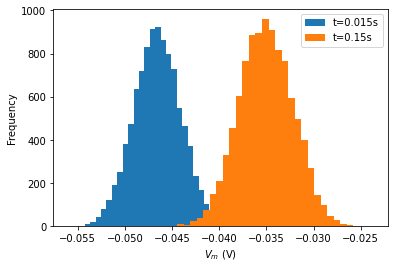

In [12]:
# exercise1
np.random.seed(2020) #set random number generator

t_range = np.arange(0, t_max, dt) # np.arange(start, stop, step)
step_end = len(t_range)
n = 10000
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**0.5 * (2 * np.random.random([n, step_end])-1))
nbins = 32

# look over time steps
for step, t in enumerate(t_range):
  # skip first iteration
  if step == 0: 
    continue
  # compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt/tau) * (el - v_n[:, step - 1] + r * i[:, step])

plt.figure()
plt.ylabel("Frequency")
plt.xlabel("$V_m$ (V)")

plt.hist(v_n[:, int(step_end/10)], nbins, label="t=" + str(t_max/10)+"s", histtype="stepfilled", linewidth=0)

plt.hist(v_n[:, -1], nbins, label="t=" + str(t_max)+"s", histtype="stepfilled", linewidth=0)

plt.legend()
plt.show()

# Section2: Dictionaries & introducing spikes


In [14]:
mydict = {1: "L", "grade": 100}
print(mydict)

{1: 'L', 'grade': 100}


In [15]:
print(mydict["grade"]) #Key -> value

100


In [16]:
print(mydict.keys())

dict_keys([1, 'grade'])


In [18]:
print(mydict.values())

dict_values(['L', 100])


In [19]:
a = list(mydict.keys())

In [20]:
print(a)

[1, 'grade']


In [21]:
for item in mydict:
  print(item, mydict[item])

1 L
grade 100


In [22]:
mydict = {x: x**2 for x in range(1, 4)}

In [23]:
for item in mydict:
  print(item, mydict[item])

1 1
2 4
3 9


In [25]:
 #insertion order
mydict = {9: "L", 1: "A"}
for item in mydict:
  print(item, mydict[item])

9 L
1 A


If $V(t) < V_{th}$ (Graded potential)
$$\tau_m \frac{d}{dt}V(t) = E_L - V(t) + RI(t)$$
Else
$$V(t) = V_r$$ 
(reset membrane potential to resting membrane potential)

record spike at time t (action potential)








## Exercise 2
```
plt.scatter(x, y, color="k', marker=".")
```
- `plt.plot` for line
- `plt.scatter` for scatter
- `plt.hist` for histogram

__raster plot__ : plot multiple neurons spike with dots, `j` means the index of a neuron.

```
plt.scatter(spike_times, j*np.ones_like(spike_times))
```

- `plt.subplot` : for multiple plots in the same figure with shared x axis and y axis through parameter `sharex`, `sharey`

- `plt.tight_layout()`: adding this at the end of subplot adjust subplot parameter automatically.

```
plt. figure()

ax1 = plt.subplot(1, 2, 1)
plt.plot(t_range, my_data_left)
plt.ylabel("ylabel")

plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(t_range, my_data_right)

plt.tight_layout()
plt.show()
```

`plt.subplot(nrow, ncol, site(?))`

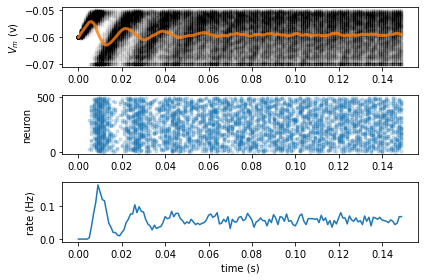

In [30]:
np. random.seed(2020)

t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**0.5 * (2 * np.random.random([n, step_end]) - 1))

spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

for step, t in enumerate(t_range):
  if step == 0:
    continue

  v_n[:, step] = v_n[:, step - 1] + (dt/tau) * (el - v_n[:, step - 1] + r* i[:, step])

  for j in range(n):
    if v_n[j, step] >= vth:
      v_n[j, step] = vr #reset voltage
      # record spike at time t
      spikes[j] += [t] # add this spike time
      spikes_n[step] += 1 # add spike count to this step

v_mean = np.mean(v_n, axis=0) 
# 매번 axis는 헷갈리지만 결과에서 어떤 축의 dimension을 남기느냐로 생각한 후에 
# 0:row ; 1:column ; 2:depth
# 이렇게 이해하면 되지 않을까?
# 예를 들어 3 x 2 x 5 에서 axis=0이면 결과물은 dim = 3으로 axis=2는 dim= 2로 말이다.
# 결과적으로 그냥 shape을 알고 어떤 방식으로 계산하고 싶은지 명확하게 하면 덜 헷갈릴 것 같다. 
# 종이에 적어서 데이터의 구성을 정확하게 이해하자. 
spikes_mean = spikes_n / n

plt.figure()

ax1 = plt.subplot(3, 1, 1) #3 by 1 array
for j in range(n):
  plt.scatter(t_range, v_n[j], color = "k", marker=".", alpha=0.01)
plt.plot(t_range, v_mean, "C1", alpha=0.8, linewidth=3)
plt.ylabel("$V_m$ (v)")

plt.subplot(3, 1, 2, sharex=ax1) # 가로축 공유

#***
for j in range(n):
  times = np.array(spikes[j]) 
  plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2)
  # np.ones_like(array_like) : array_like data와 같은 모양의 1로 가득찬 ndarray를 return한다 
#***

plt.ylabel("neuron")

plt.subplot(3,1,3, sharex = ax1)
plt.plot(t_range, spikes_mean)
plt.xlabel("time (s)")
plt.ylabel("rate (Hz)")

plt.tight_layout()







```
for j in range(n):
  times = np.array(spikes[j]) 
  plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2)
```
이 부분이 어려웠다. 이해가 잘 되지 않는다. 

따라서 치는 게 상당히 뭐랄까 머리속으로 잘 들어오지 않는 이유는 내가 이걸 어떻게 생각해서 칠까하는 불확실함이 있기 때문에 그런 것 같다. 있는 걸 이해하는 건 충분히 할 수 있는데, 내가 이걸 생각해 낼 수 있을까 하는 불안감이 있다. 코드를 안 보고 한 번 쳐보면서 내가 스스로 모델을 구성하는 과정을 되짚어 보는 것도 해보아야 할 것 같다. 

# Section 3: Boolean indeces


In [31]:
a = np.array([1,2,3])
b = a >=2
print(b)

[False  True  True]


In [32]:
print(a[b])

[2 3]


In [33]:
print(a[a>=2]) # like filter

[2 3]


## broadcasting
ndarray에서 "+" 연산은 함께 다른 argument의 모든 element에 적용된다. 
이를 확장하면 2x1 3x1 를 더하면 2x3의 ndarray가 나오는 것으로 이해할 수 있다.